## 결정트리(Decision Tree)

- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 ==> 앙상블

In [1]:
# 모듈 로딩 --------------------------------------------------
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import plot_tree # 트리 시각화 함수
import matplotlib.pyplot as plt

## [1] 데이터 로딩




In [2]:
# numpy => DataFrame 형태로 데이터 로딩
# return_X_y=True, as_frame=True
dataX, datay = load_breast_cancer(return_X_y=True, as_frame=True)

# Bunch 타입 = key로 data, target, target_names, feature_names....


In [3]:
dataX.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [4]:
dataX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
type(dataX.values)

numpy.ndarray

In [6]:
f_names = dataX.columns

In [7]:
# dataX.values, # datay.values or numpy 변경
dataX = dataX.to_numpy()
datay = datay.to_numpy()

In [8]:
# 분류같은 경우에 비율을 맞춰주는게 좋음 ==> stratify = target
train_input, test_input, train_target, test_target = train_test_split(dataX, datay,
                                                                      stratify=datay,
                                                                      random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(426, 30) (143, 30)


### [3] 학습

In [10]:
dtModel = DecisionTreeClassifier()

In [11]:
dtModel.fit(train_input, train_target)

DecisionTreeClassifier()

In [12]:
print(dtModel.score(train_input,train_target))
print(dtModel.score(test_input,test_target))

1.0
0.9300699300699301


[Text(0.6794354838709677, 0.9375, 'X[22] <= 112.8\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.4879032258064516, 0.8125, 'X[27] <= 0.146\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.33064516129032256, 0.6875, 'X[13] <= 42.95\ngini = 0.06\nsamples = 260\nvalue = [8, 252]'),
 Text(0.20967741935483872, 0.5625, 'X[27] <= 0.136\ngini = 0.031\nsamples = 251\nvalue = [4, 247]'),
 Text(0.12903225806451613, 0.4375, 'X[14] <= 0.003\ngini = 0.016\nsamples = 245\nvalue = [2, 243]'),
 Text(0.06451612903225806, 0.3125, 'X[14] <= 0.003\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.03225806451612903, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.0967741935483871, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1935483870967742, 0.3125, 'X[21] <= 33.27\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.16129032258064516, 0.1875, 'gini = 0.0\nsamples = 222\nvalue = [0, 222]'),
 Text(0.22580645161290322, 0.1875, 'X[21] <= 33.8\ngini = 0

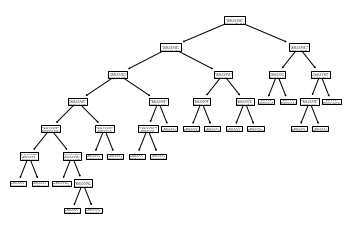

In [13]:
plot_tree(dtModel)

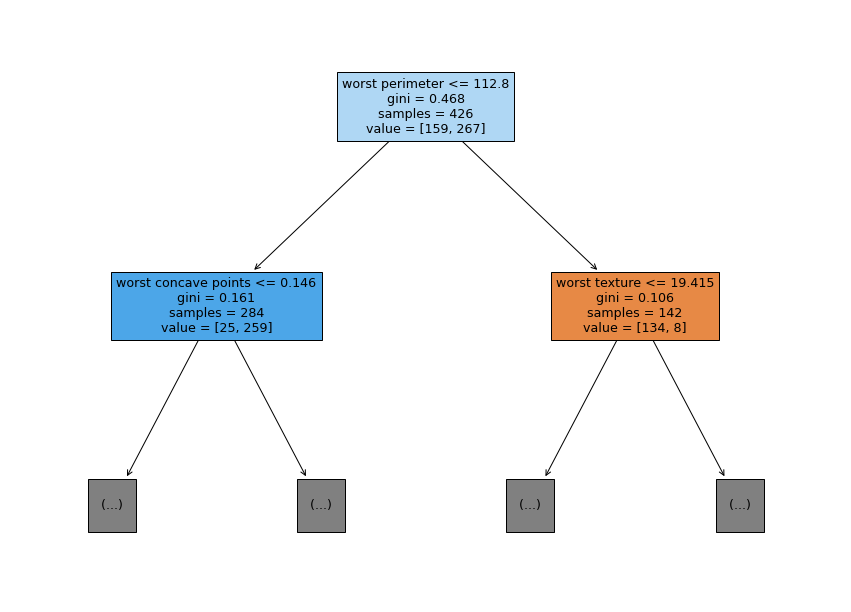

In [19]:
plt.figure(figsize=(15,11))
plot_tree(dtModel,max_depth=1, filled= True, feature_names=f_names)
plt.savefig('tree') # 현재 figure에 있는 그래프 파일로 저장
plt.show()

In [16]:
f_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

### 모델 속성 확인


- DT에서 속성들 중에서 속성도 중요도를 감지 가능
- Feature별로 특성들의 중요도 값
- 모든 값 합치면 1

In [25]:
dtModel.feature_importances_.argmax() # feature 값에 대한 중요도. 다 합치면 1이 됨

22

In [26]:
f_names[22]

'worst perimeter'

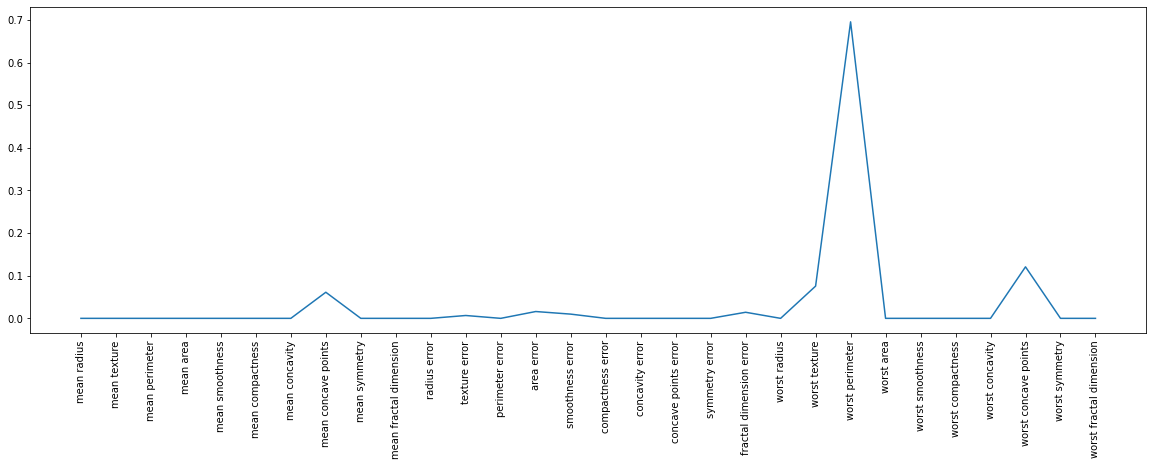

In [34]:
plt.figure(figsize=(20,6))
plt.plot(f_names,dtModel.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### RandomForest 학습 모델

- 100개 DecisionTree 모델
- 중복허용된 랜덤샘플 데이터 + DecisionTree 모델

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
# oob_score = 중복허용랜덤샘플에 포함되지 않은 데이터 => 검증용으로 사용
forestModel = RandomForestClassifier(max_depth=5,oob_score=True)

In [88]:
forestModel.fit(train_input, train_target)

RandomForestClassifier(max_depth=5, oob_score=True)

In [89]:
print(forestModel.score(train_input, train_target))
print(forestModel.score(test_input, test_target))

0.9929577464788732
0.958041958041958


In [90]:
forestModel.classes_

array([0, 1])

In [91]:
forestModel.base_estimator_

DecisionTreeClassifier()

In [92]:
forestModel.oob_score_

0.9577464788732394

In [93]:
print(forestModel.score(train_input, train_target))
print(forestModel.score(test_input, test_target))

0.9929577464788732
0.958041958041958


In [94]:
forestModel.feature_importances_

array([0.05955488, 0.01232749, 0.06316195, 0.04842956, 0.00832542,
       0.0251457 , 0.05311243, 0.07831225, 0.00362599, 0.00253219,
       0.0091654 , 0.00583368, 0.00614619, 0.06180174, 0.00390134,
       0.00512575, 0.00607065, 0.00502755, 0.00205637, 0.00563423,
       0.08038335, 0.01641515, 0.12726132, 0.11304751, 0.01116974,
       0.02117977, 0.01624499, 0.13610359, 0.00876765, 0.00413616])

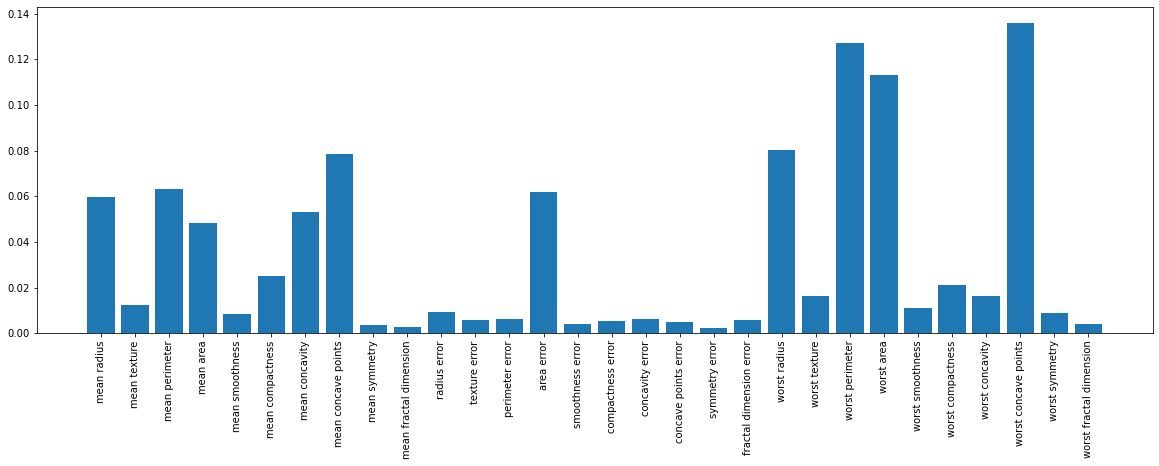

In [97]:
plt.figure(figsize=(20,6))
plt.bar(f_names,forestModel.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [99]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 125.4/125.4 MB 4.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
!pip install LightGBM

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.0/1.0 MB 5.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
